# Decision Tree

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
x_train, x_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

<b>Step 1:</b> Make an instance of the Model

In [3]:
reg = DecisionTreeClassifier(max_depth=2, random_state=0)

<b>Step 2:</b> Training the model on the data, storing the information learned from the data

In [4]:
reg.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

<b>Step 3:</b> Predict the labels of new data

In [5]:
reg.predict(x_test.iloc[0].values.reshape(1, -1))

array([2])

In [6]:
reg.predict(x_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

<b>Step 4:</b> Measuring Model Performance

In [7]:
print('Score: {:.2f}'.format(reg.score(x_test, y_test)*100))

Score: 89.47


In [8]:
accuracy = []
for depth in range(1,6):
    reg = DecisionTreeClassifier(max_depth=depth, random_state=0)
    reg.fit(x_train, y_train)
    score = reg.score(x_test, y_test)
    accuracy.append(score)

<ipython-input-9-1ec958f314a2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


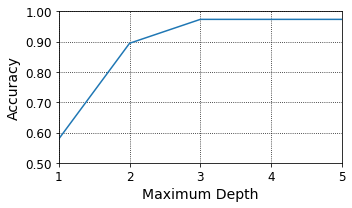

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,3));
ax.plot(list(range(1,6)), accuracy)

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')
yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks: y_ticklist.append(str(tick).ljust(4,'0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Maximum Depth', fontsize = 14)
ax.set_ylabel('Accuracy', fontsize = 14)
ax.tick_params(labelsize = 12)
fig.tight_layout()

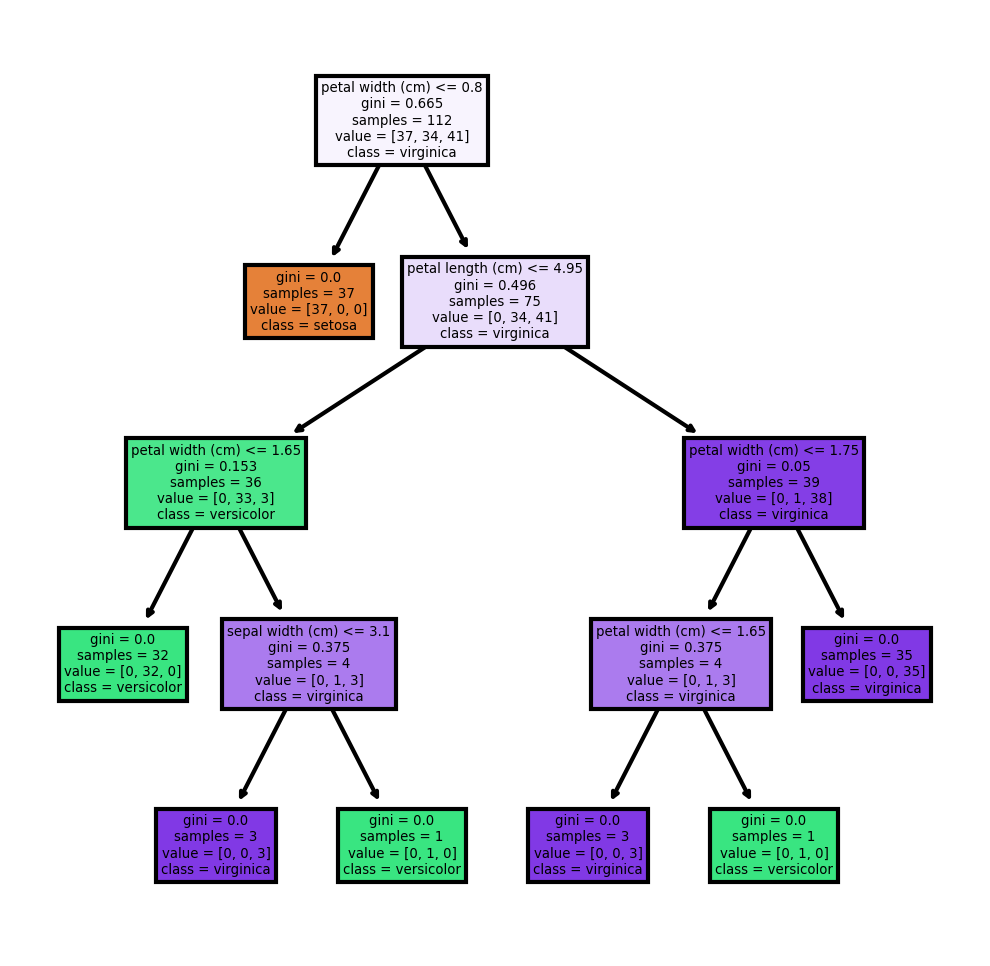

In [10]:
fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(reg, feature_names=fn, class_names=cn, filled=True);
fig.savefig('images/3A.png')

# Bagging Tree

In [11]:
df = pd.read_csv('data/D.csv')
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
x = df.loc[:, features]
y = df.loc[:, 'price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

<b>Step 1:</b> Make an instance of the Model

In [12]:
reg = BaggingRegressor(n_estimators=100, random_state=0)

<b>Step 2:</b> Training the model on the data, storing the information learned from the data

In [13]:
reg.fit(x_train, y_train)

BaggingRegressor(n_estimators=100, random_state=0)

<b>Step 3:</b> Make Predictions

In [14]:
reg.predict(x_test.iloc[0].values.reshape(1, -1))

array([353334.6])

In [15]:
reg.predict(x_test[0:10])

array([ 353334.6 , 1011004.77,  450212.76,  418593.  ,  772871.7 ,
        405436.5 ,  361353.02,  720323.9 ,  580438.82, 1623570.8 ])

<b>Step 4:</b> Measuring Model Performance

In [16]:
print('Score: {:.2f}'.format(reg.score(x_test, y_test)*100))

Score: 57.86


In [17]:
estimator_range = [1] + list(range(10, 150, 20))
scores = []

for estimator in estimator_range:
    reg = BaggingRegressor(n_estimators=estimator, random_state=0)
    reg.fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

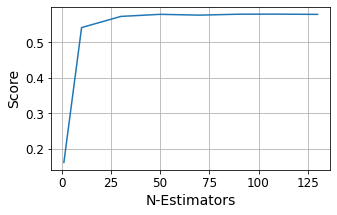

In [18]:
plt.figure(figsize = (5,3))
plt.plot(estimator_range, scores);

plt.xlabel('N-Estimators', fontsize = 14);
plt.ylabel('Score', fontsize = 14);
plt.tick_params(labelsize = 12)
plt.grid()